## Loading dataset

In [1]:
import json

# Specify the path to your JSON file
file_path = "amazon_uk_shoes_dataset.json"

# Open the JSON file and load its contents
with open(file_path, "r") as file:
    data = json.load(file)

In [2]:
data


[{'url': 'https://www.amazon.co.uk/dp/B08BLP231K',
  'title': 'Geox Jr Sandal Strada B Fisherman, Brown Red, 2.5 UK Child',
  'asin': 'B08BLP231K',
  'price': '£50.00',
  'brand': 'Visit the Geox Store',
  'product_details': "Package Dimensions\n\u200f\n:\n\u200e\n\n31.2 x 21.4 x 11.4 cm; 820 Grams\n\n\nDate First Available\n\u200f\n:\n\u200e\n\n22 Jun. 2020\n\n\nManufacturer\n\u200f\n:\n\u200e\n\nGeox\n\n\nASIN\n\u200f\n:\n\u200e\n\nB08BLP231K\n\n\nItem model number\n\u200f\n:\n\u200e\n\nJ1524B02214\n\n\nCountry of origin\n\u200f\n:\n\u200e\n\nVietnam\n\n\nDepartment\n\u200f\n:\n\u200e\n\nBoy's",
  'breadcrumbs': "Shoes/Boys' Shoes/Sandals",
  'images_list': ['https://m.media-amazon.com/images/I/41OuvqjhaqL.jpg',
   'https://m.media-amazon.com/images/I/51zt+Bb48FL.jpg',
   'https://m.media-amazon.com/images/I/51EXdVtkpAL.jpg',
   'https://m.media-amazon.com/images/I/41u3T2DxWkL.jpg',
   'https://m.media-amazon.com/images/I/41ZOt3pgbSL.jpg',
   'https://m.media-amazon.com/images/I/41FE

### Procesing json file data to Data frames

In [3]:
import pandas as pd

def process_dataset(data):
    # Initialize lists to store processed data
    urls = []
    titles = []
    asins = []
    prices = []
    brands = []
    package_dimensions = []
    date_first_available = []
    manufacturers = []
    asin_numbers = []
    item_model_numbers = []
    countries_of_origin = []
    departments = []
    breadcrumbs = []
    images_lists = []
    outer_materials = []
    inner_materials = []
    soles = []
    closures = []
    heel_heights = []
    heel_types = []
    shoe_widths = []

    # Process each item in the dataset
    for item in data:
        # Append values to respective lists
        urls.append(item.get('url'))
        titles.append(item.get('title'))
        asins.append(item.get('asin'))
        prices.append(item.get('price'))
        brands.append(item.get('brand'))

        # Process product details
        product_details = item.get('product_details').split('\n\n\n')
        package_dimensions.append(product_details[0].split(':')[-1].strip() if len(product_details) > 0 else None)
        date_first_available.append(product_details[1].split(':')[-1].strip() if len(product_details) > 1 else None)
        manufacturers.append(product_details[2].split(':')[-1].strip() if len(product_details) > 2 else None)
        asin_numbers.append(product_details[3].split(':')[-1].strip() if len(product_details) > 3 else None)
        item_model_numbers.append(product_details[4].split(':')[-1].strip() if len(product_details) > 4 else None)
        countries_of_origin.append(product_details[5].split(':')[-1].strip() if len(product_details) > 5 else None)
        departments.append(product_details[6].split(':')[-1].strip() if len(product_details) > 6 else None)

        # Process breadcrumbs
        breadcrumbs.append(item.get('breadcrumbs'))

        # Process images list
        images_lists.append(item.get('images_list'))

        # Process features
        features = item.get('features')
        outer_materials.append(next((f['Outer Material'] for f in features if 'Outer Material' in f), None))
        inner_materials.append(next((f['Inner Material'] for f in features if 'Inner Material' in f), None))
        soles.append(next((f['Sole'] for f in features if 'Sole' in f), None))
        closures.append(next((f['Closure'] for f in features if 'Closure' in f), None))
        heel_heights.append(next((f['Heel Height'] for f in features if 'Heel Height' in f), None))
        heel_types.append(next((f['Heel Type'] for f in features if 'Heel Type' in f), None))
        shoe_widths.append(next((f['Shoe Width'] for f in features if 'Shoe Width' in f), None))

    # Create DataFrame from processed data
    df = pd.DataFrame({
        'url': urls,
        'title': titles,
        'asin': asins,
        'price': prices,
        'brand': brands,
        'package_dimensions': package_dimensions,
        'date_first_available': date_first_available,
        'manufacturer': manufacturers,
        'asin_number': asin_numbers,
        'item_model_number': item_model_numbers,
        'country_of_origin': countries_of_origin,
        'department': departments,
        'breadcrumbs': breadcrumbs,
        'images_list': images_lists,
        'outer_material': outer_materials,
        'inner_material': inner_materials,
        'sole': soles,
        'closure': closures,
        'heel_height': heel_heights,
        'heel_type': heel_types,
        'shoe_width': shoe_widths
    })

    return df


In [4]:
# Process the dataset
processed_df = process_dataset(data)

In [5]:
# Display the processed DataFrame
processed_df.head()

,url,title,asin,price,brand,package_dimensions,date_first_available,manufacturer,asin_number,item_model_number,...,department,breadcrumbs,images_list,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width
0,https://www.amazon.co.uk/dp/B08BLP231K,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",B08BLP231K,£50.00,Visit the Geox Store,‎\n\n31.2 x 21.4 x 11.4 cm; 820 Grams,‎\n\n22 Jun. 2020,‎\n\nGeox,‎\n\nB08BLP231K,‎\n\nJ1524B02214,...,‎\n\nBoy's,Shoes/Boys' Shoes/Sandals,[https://m.media-amazon.com/images/I/41Ouvqjha...,Synthetic,Synthetic,Rubber,Strap,2 centimetres,Flat,Medium
1,https://www.amazon.co.uk/dp/B08N587YZ9,Fila Women's Oakmont Tr Sneaker,B08N587YZ9,£49.57 - £234.95,Fila,‎\n\n32.51 x 21.84 x 12.19 cm; 952.54 Grams,‎\n\n6 Jun. 2020,‎\n\nFila,‎\n\nB089RQLYNW,‎\n\n5JM00948-990,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/416fCMuxw...,fabric,None,Rubber,Lace-Up,None,No Heel,medium
2,https://www.amazon.co.uk/dp/B0918K4H1W,Gabor Rollingsoft Trainers in Plus Sizes Beige...,B0918K4H1W,None,Gabor,‎\n\nNo,‎\n\n26 April 2021,‎\n\nrollingsoft,‎\n\nB0918K4H1W,‎\n\n66.938-30,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/31GuoIF6F...,Leather,None,Leather,Lace-Up,None,None,Schmal
3,https://www.amazon.co.uk/dp/B07KMB98CG,Merrell Women'S Bare Access Xtr Trail Running ...,B07KMB98CG,£67.00 - £182.44,Visit the Merrell Store,‎\n\n28.96 x 19.81 x 10.16 cm; 544 Grams,‎\n\n20 Jan. 2020,‎\n\nMerrell,‎\n\nB07VFXC6T4,‎\n\nJ066420,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/51bLpccQM...,Synthetic,Manmade,Synthetic,Lace-Up,None,None,Medium
4,https://www.amazon.co.uk/dp/B08CN3S1ZK,Desigual Women's Shoes_Runner_cmofl Sneakers W...,B08CN3S1ZK,£38.96 - £81.10,Desigual,‎\n\n34.6 x 21.8 x 11.6 cm; 500 Grams,‎\n\n13 July 2020,‎\n\nDesigual,‎\n\nB08CN4MH5P,‎\n\n9019,...,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,[https://m.media-amazon.com/images/I/41nMmmxX-...,Polyester,Synthetic,Rubber,Lace-Up,None,Flat,Medium


In [6]:
processed_df['title'].value_counts()

ARA Women's ROM Sneaker                                                                      11
ARA Women's Osaka Sneaker                                                                     7
HROYL Women/Girls' Professional Dance Shoes Salsa Ballroom Latin American Dance Shoes,213     6
New Balance Men's 4040v5 Metal Baseball Cleat                                                 6
mys Boys’ Chuck Taylor Hi-Top Slippers                                                        6
                                                                                             ..
Skechers - Womens Ghenter - Dagsby Shoe, Size:                                                1
adidas Kids' Pro Spark 2018 Shoes                                                             1
Geox Girl's J Piuma Bal.f Ballet Flat                                                         1
PANTOFOLA D’ORO 1886 Men's League Low Oxford Flat                                             1
viking Jolly Winter Rain Boot Child     

### Removing unnecessary columns

In [7]:
# Remove 'url' and 'images_list' columns
processed_df.drop(columns=['url', 'images_list'], inplace=True)
# Remove '\n' and extra whitespaces from all string columns
processed_df = processed_df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
processed_df = processed_df.apply(lambda x: x.str.replace('\n\n', '') if x.dtype == 'object' else x)

# Display the cleaned DataFrame
processed_df.head()

,title,asin,price,brand,package_dimensions,date_first_available,manufacturer,asin_number,item_model_number,country_of_origin,department,breadcrumbs,outer_material,inner_material,sole,closure,heel_height,heel_type,shoe_width
0,"Geox Jr Sandal Strada B Fisherman, Brown Red, ...",B08BLP231K,£50.00,Visit the Geox Store,‎31.2 x 21.4 x 11.4 cm; 820 Grams,‎22 Jun. 2020,‎Geox,‎B08BLP231K,‎J1524B02214,‎Vietnam,‎Boy's,Shoes/Boys' Shoes/Sandals,Synthetic,Synthetic,Rubber,Strap,2 centimetres,Flat,Medium
1,Fila Women's Oakmont Tr Sneaker,B08N587YZ9,£49.57 - £234.95,Fila,‎32.51 x 21.84 x 12.19 cm; 952.54 Grams,‎6 Jun. 2020,‎Fila,‎B089RQLYNW,‎5JM00948-990,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,fabric,None,Rubber,Lace-Up,None,No Heel,medium
2,Gabor Rollingsoft Trainers in Plus Sizes Beige...,B0918K4H1W,None,Gabor,‎No,‎26 April 2021,‎rollingsoft,‎B0918K4H1W,‎66.938-30,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Leather,None,Leather,Lace-Up,None,None,Schmal
3,Merrell Women'S Bare Access Xtr Trail Running ...,B07KMB98CG,£67.00 - £182.44,Visit the Merrell Store,‎28.96 x 19.81 x 10.16 cm; 544 Grams,‎20 Jan. 2020,‎Merrell,‎B07VFXC6T4,‎J066420,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Synthetic,Manmade,Synthetic,Lace-Up,None,None,Medium
4,Desigual Women's Shoes_Runner_cmofl Sneakers W...,B08CN3S1ZK,£38.96 - £81.10,Desigual,‎34.6 x 21.8 x 11.6 cm; 500 Grams,‎13 July 2020,‎Desigual,‎B08CN4MH5P,‎9019,‎Women's,None,Shoes/Women's Shoes/Fashion & Athletic Trainer...,Polyester,Synthetic,Rubber,Lace-Up,None,Flat,Medium


### Information about the data 

In [8]:
# Display basic information about the dataset
print("Shape of the dataset:", processed_df.shape)
print("\nColumns in the dataset:", processed_df.columns)
print("\nData types of columns:")
print(processed_df.dtypes)

Shape of the dataset: (11605, 19)

Columns in the dataset: Index(['title', 'asin', 'price', 'brand', 'package_dimensions',
       'date_first_available', 'manufacturer', 'asin_number',
       'item_model_number', 'country_of_origin', 'department', 'breadcrumbs',
       'outer_material', 'inner_material', 'sole', 'closure', 'heel_height',
       'heel_type', 'shoe_width'],
      dtype='object')

Data types of columns:
title                   object
asin                    object
price                   object
brand                   object
package_dimensions      object
date_first_available    object
manufacturer            object
asin_number             object
item_model_number       object
country_of_origin       object
department              object
breadcrumbs             object
outer_material          object
inner_material          object
sole                    object
closure                 object
heel_height             object
heel_type               object
shoe_width           

### Handling extra columns

In [9]:
import numpy as np

# Convert 'price' column to string type to handle null values
processed_df['price'] = processed_df['price'].astype(str)

# Function to handle price conversion
def convert_price(price_str):
    if price_str.strip() == 'None':
        return np.nan
    price_list = price_str.split(' - ')
    if len(price_list) == 1:
        return float(price_list[0].replace('£', '').replace(',', ''))
    else:
        return (float(price_list[0].replace('£', '').replace(',', '')) + float(price_list[-1].replace('£', '').replace(',', ''))) / 2

# Apply function to 'price' column
processed_df['price'] = processed_df['price'].apply(convert_price)

# Remove non-ASCII characters and leading/trailing spaces from 'date_first_available' column
processed_df['date_first_available'] = processed_df['date_first_available'].str.replace(r'[^ -~]', '').str.strip()

# Replace invalid values with NaN
processed_df['date_first_available'] = processed_df['date_first_available'].replace(['None', 'V6471'], pd.NA)

# Convert 'date_first_available' to datetime
processed_df['date_first_available'] = pd.to_datetime(processed_df['date_first_available'], errors='coerce')

C:\Users\harsh\AppData\Local\Temp\ipykernel_10212\3922608052.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_df['date_first_available'] = processed_df['date_first_available'].str.replace(r'[^ -~]', '').str.strip()


In [10]:
print(processed_df.dtypes)

title                           object
asin                            object
price                          float64
brand                           object
package_dimensions              object
date_first_available    datetime64[ns]
manufacturer                    object
asin_number                     object
item_model_number               object
country_of_origin               object
department                      object
breadcrumbs                     object
outer_material                  object
inner_material                  object
sole                            object
closure                         object
heel_height                     object
heel_type                       object
shoe_width                      object
dtype: object


In [11]:
# Check for missing values
print("\nMissing values:")
print(processed_df.isnull().sum())


Missing values:
title                      0
asin                       0
price                    437
brand                      0
package_dimensions         0
date_first_available    3563
manufacturer             671
asin_number              869
item_model_number       1492
country_of_origin       2805
department              9924
breadcrumbs                0
outer_material          3042
inner_material          5821
sole                    1827
closure                  943
heel_height             8740
heel_type               5435
shoe_width              1164
dtype: int64


### Handling missing values

In [12]:
# Fill missing values
processed_df['price'].fillna(processed_df['price'].median(), inplace=True)
processed_df['date_first_available'].fillna(processed_df['date_first_available'].mode()[0], inplace=True)
processed_df['manufacturer'].fillna('Unknown', inplace=True)
processed_df['asin_number'].fillna('Unknown', inplace=True)
processed_df['item_model_number'].fillna('Unknown', inplace=True)
processed_df['country_of_origin'].fillna('Unknown', inplace=True)
processed_df['outer_material'].fillna('Unknown', inplace=True)
processed_df['inner_material'].fillna('Unknown', inplace=True)
processed_df['sole'].fillna('Unknown', inplace=True)
processed_df['closure'].fillna('Unknown', inplace=True)
processed_df['heel_height'].fillna('Unknown', inplace=True)
processed_df['heel_type'].fillna('Unknown', inplace=True)
processed_df['shoe_width'].fillna('Unknown', inplace=True)
processed_df['department'].fillna('Unknown', inplace=True)


### Cleaned data

In [13]:
# Confirm missing values are handled
print("\nMissing values after handling:")
print(processed_df.isnull().sum())

# Display updated shape of the dataset
print("\nShape of the dataset after handling missing values:", processed_df.shape)


Missing values after handling:
title                   0
asin                    0
price                   0
brand                   0
package_dimensions      0
date_first_available    0
manufacturer            0
asin_number             0
item_model_number       0
country_of_origin       0
department              0
breadcrumbs             0
outer_material          0
inner_material          0
sole                    0
closure                 0
heel_height             0
heel_type               0
shoe_width              0
dtype: int64

Shape of the dataset after handling missing values: (11605, 19)


In [41]:
import numpy as np
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
    # Plot 1: Word Cloud of Product Descriptions
    text = ' '.join(processed_df['title'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white',prefer_horizontal=0.9,font_path='arialbd.ttf').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Product Descriptions')
    plt.axis('off')
    plt.show()

NameError: name 'WordCloud' is not defined

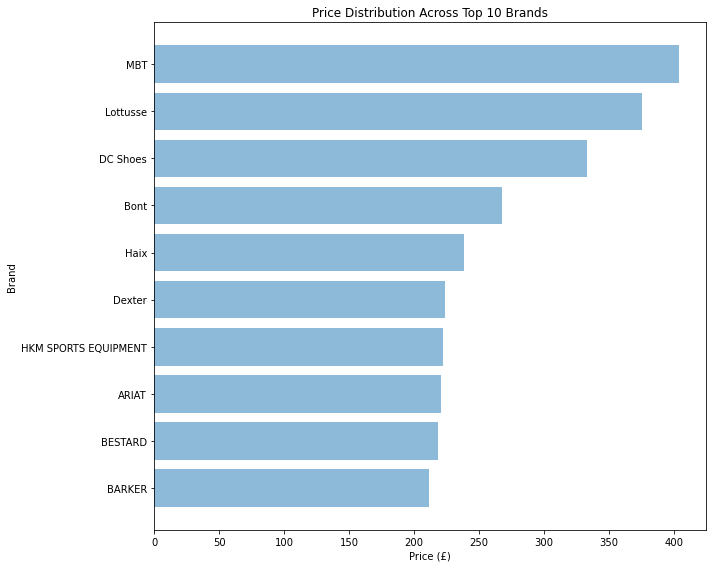

In [39]:
# Calculate mean price for each brand
brand_mean_price = processed_df.groupby('brand')['price'].mean()

# Select top 10 brands based on mean price
top_10_brands = brand_mean_price.sort_values(ascending=False).head(10)

# Plot horizontal bar plot for top 10 brands
plt.figure(figsize=(10, 8))
plt.barh(top_10_brands.index, top_10_brands.values, alpha=0.5)
plt.title('Price Distribution Across Top 10 Brands')
plt.xlabel('Price (£)')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

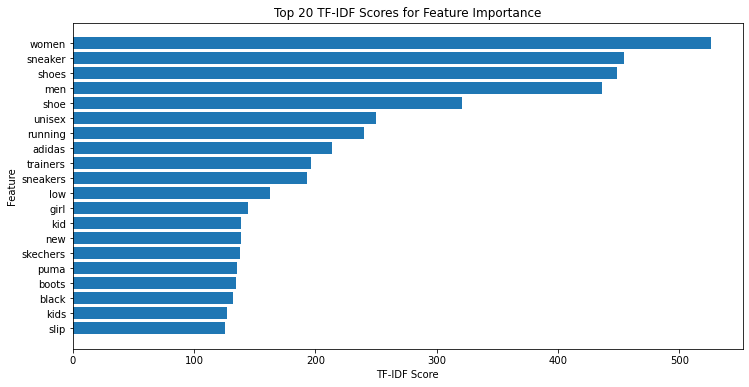

In [42]:
# Plot 4: Heatmap of TF-IDF Scores for Feature Importance
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(processed_df['title'].fillna(''))
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.sum(tfidf_matrix, axis=0).A1
feature_importance = pd.Series(index=feature_names, data=tfidf_scores)
top_features = feature_importance.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_features.index[::-1], top_features.values[::-1])
plt.title('Top 20 TF-IDF Scores for Feature Importance')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

In [47]:
import numpy as np

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from each column of package_dimensions using the defined function
for col in package_dimensions.columns:
    package_dimensions = remove_outliers_iqr(package_dimensions, col)

# Display the DataFrame after removing outliers
package_dimensions


,0_0,0_1,0_2,0_3,mean
0,31.20,21.40,11.40,820.00,221.0000
1,32.51,21.84,12.19,952.54,254.7700
3,28.96,19.81,10.16,544.00,150.7325
4,34.60,21.80,11.60,500.00,142.0000
5,24.13,15.24,10.16,402.56,113.0225
...,...,...,...,...,...
11594,30.00,20.00,10.00,1.00,15.2500
11595,30.40,23.80,11.00,1.00,16.5500
11601,35.05,19.81,12.45,1.32,17.1575
11603,33.53,20.32,12.95,215.46,70.5650


In [48]:
import plotly.graph_objects as go

# Plotly 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(
    x=package_dimensions['0_0'].dropna(),  # X-axis
    y=package_dimensions['0_1'].dropna(),  # Y-axis
    z=package_dimensions['0_2'].dropna(),  # Z-axis
    mode='markers',
    marker=dict(
        size=2,  # Color based on Z-axis
        colorscale='Viridis',  # Set colorscale
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(scene=dict(
                    xaxis_title='Lenght',
                    yaxis_title='Breath',
                    zaxis_title='Height'),
                  title='3D Scatter Plot of Package Dimensions')

# Show the plot
fig.show()


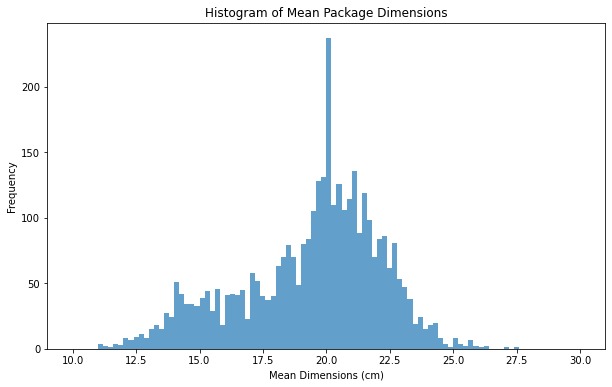

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming processed_df is your original DataFrame with the 'package_dimensions' column
# Extract length, breadth, height, and weight from the package dimensions column
processed_df[['length_cm', 'breadth_cm', 'height_cm', 'weight_grams']] = processed_df['package_dimensions'].str.extract(r'([\d.]+) x ([\d.]+) x ([\d.]+) cm; (\d+) Grams')

# Convert the extracted dimensions to numeric values
processed_df[['length_cm', 'breadth_cm', 'height_cm', 'weight_grams']] = processed_df[['length_cm', 'breadth_cm', 'height_cm', 'weight_grams']].astype(float)

# Calculate the mean for each row of the dimensions, ignoring NaN values
processed_df['mean_dimensions'] = processed_df[['length_cm', 'breadth_cm', 'height_cm']].mean(axis=1, skipna=True)

# Remove outliers using IQR method for each dimension column
Q1 = processed_df[['length_cm', 'breadth_cm', 'height_cm']].quantile(0.05)
Q3 = processed_df[['length_cm', 'breadth_cm', 'height_cm']].quantile(0.95)
IQR = Q3 - Q1

processed_df = processed_df[~((processed_df[['length_cm', 'breadth_cm', 'height_cm']] < (Q1 - 1.5 * IQR)) | (processed_df[['length_cm', 'breadth_cm', 'height_cm']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot histogram of mean dimensions
plt.figure(figsize=(10, 6))
plt.hist(processed_df['mean_dimensions'].dropna(), bins=100, range=(10, 30), alpha=0.7)
plt.title('Histogram of Mean Package Dimensions')
plt.xlabel('Mean Dimensions (cm)')
plt.ylabel('Frequency')
plt.show()
